# Aliens in America
Name: Christopher Hunt Jr.

## Importing Data

### CSV's

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

details = pd.read_csv('Data/alien_details.csv')
user_info = pd.read_csv('Data/alien_user_info.csv')
location = pd.read_csv('Data/alien_location.csv')

### Merging DataFrames

In [2]:
# Checking Column names
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          50000 non-null  int64 
 1   favorite_food      50000 non-null  object
 2   feeding_frequency  50000 non-null  object
 3   aggressive         50000 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 1.2+ MB


In [3]:
# Checking Column names
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          50000 non-null  int64 
 1   first_name  50000 non-null  object
 2   last_name   50000 non-null  object
 3   email       50000 non-null  object
 4   gender      50000 non-null  object
 5   type        50000 non-null  object
 6   birth_year  50000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [4]:
# Checking Column names
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   loc_id            50000 non-null  int64 
 1   current_location  50000 non-null  object
 2   state             50000 non-null  object
 3   country           50000 non-null  object
 4   occupation        50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [38]:
# Renaming the id Columns for location and details DataFrame
location.rename(columns={'loc_id':'id'}, inplace=True)
details.rename(columns={'detail_id':'id'}, inplace=True)

# Combining DataFrames
combined_df = pd.merge(details, user_info, left_on='id', right_on='id')
alien = pd.merge(combined_df, location, left_on='id', right_on='id')

### Merged DataFrame

In [39]:
# Viewing the combined dataframe
alien.head()

,id,favorite_food,feeding_frequency,aggressive,first_name,last_name,email,gender,type,birth_year,current_location,state,country,occupation
0,1,White-faced tree rat,Weekly,True,Tyrus,Wrey,twrey0@sakura.ne.jp,Agender,Reptile,1717,Cincinnati,Ohio,United States,Senior Cost Accountant
1,2,"Lizard, goanna",Seldom,False,Ealasaid,St Louis,estlouis1@amazon.co.uk,Female,Flatwoods,1673,Bethesda,Maryland,United States,Senior Sales Associate
2,3,Indian red admiral,Weekly,True,Violette,Sawood,vsawood2@yolasite.com,Female,Nordic,1675,Oakland,California,United States,Registered Nurse
3,4,"Bandicoot, southern brown",Often,False,Rowan,Saintsbury,rsaintsbury3@rediff.com,Male,Green,1731,Richmond,Virginia,United States,Director of Sales
4,5,"Kangaroo, red",Once,False,Free,Ingolotti,fingolotti4@bbb.org,Genderfluid,Flatwoods,1763,Atlanta,Georgia,United States,Administrative Officer


## Exploration

### Feeding Frequency

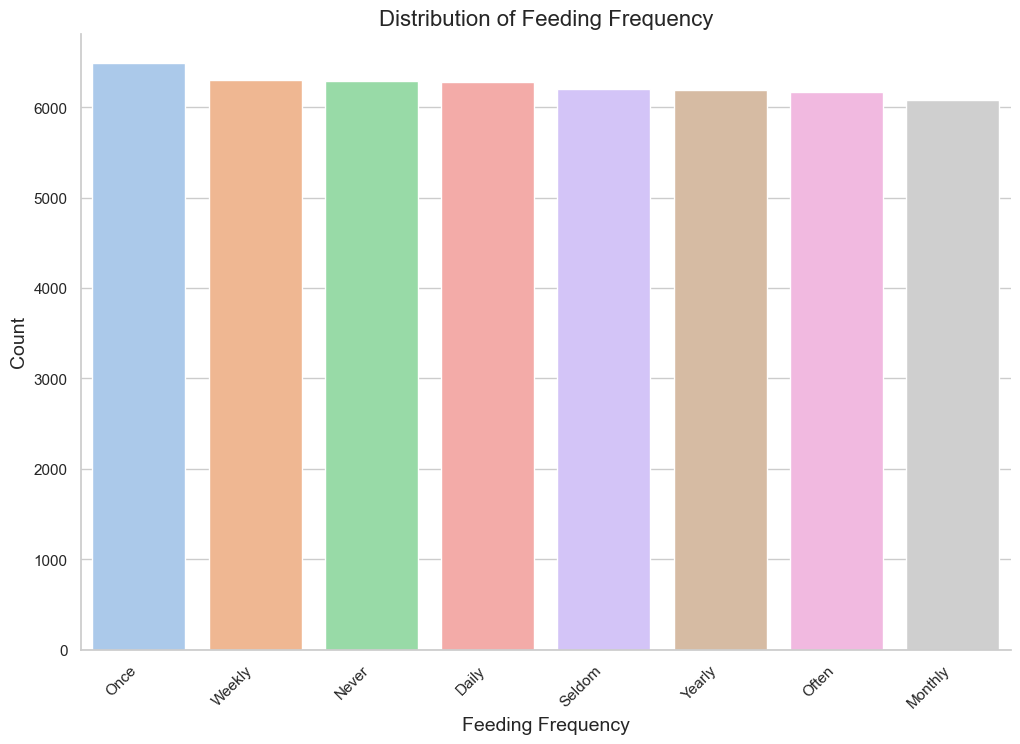

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pastel")

sns.countplot(x='feeding_frequency', data=alien, palette=colors, order=alien['feeding_frequency'].value_counts().index)

plt.title('Distribution of Feeding Frequency', fontsize=16)
plt.xlabel('Feeding Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.show()

### Agressive/Non-Aggressive

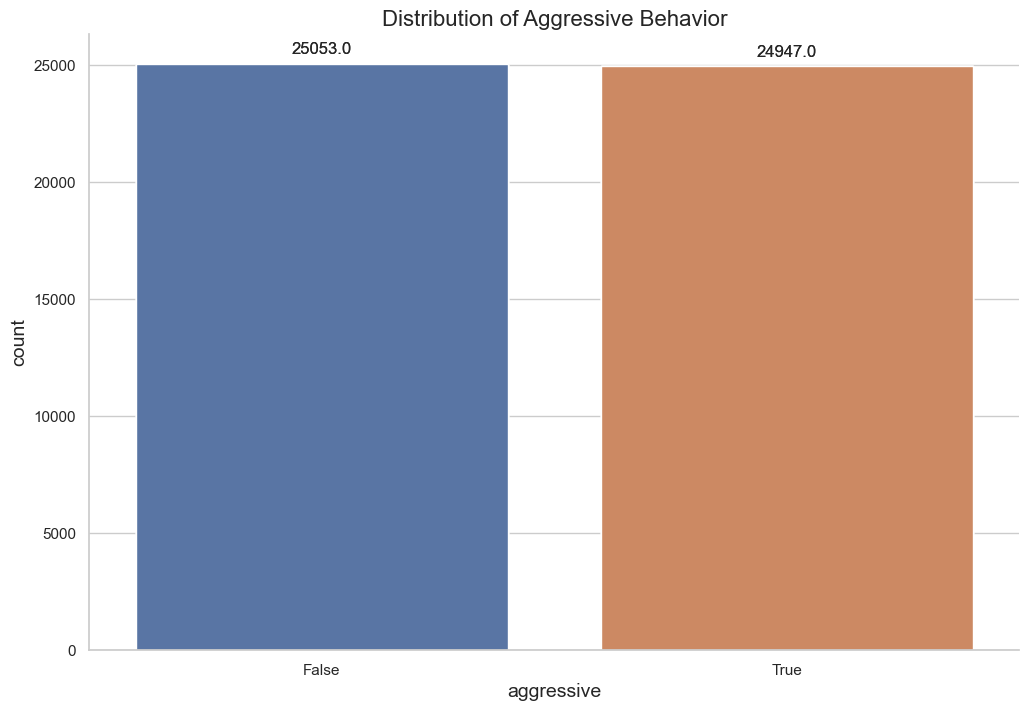

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pastel")

sns.countplot(x='aggressive', data=alien, palette=colors, order=alien['aggressive'].value_counts().index)

plt.title('Distribution of Aggressive Behavior', fontsize=16)
plt.xlabel('Aggressive Behavior', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in sns.countplot(x='aggressive', data=alien).patches:
    sns.countplot(x='aggressive', data=alien).annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine()
plt.show()

### Gender

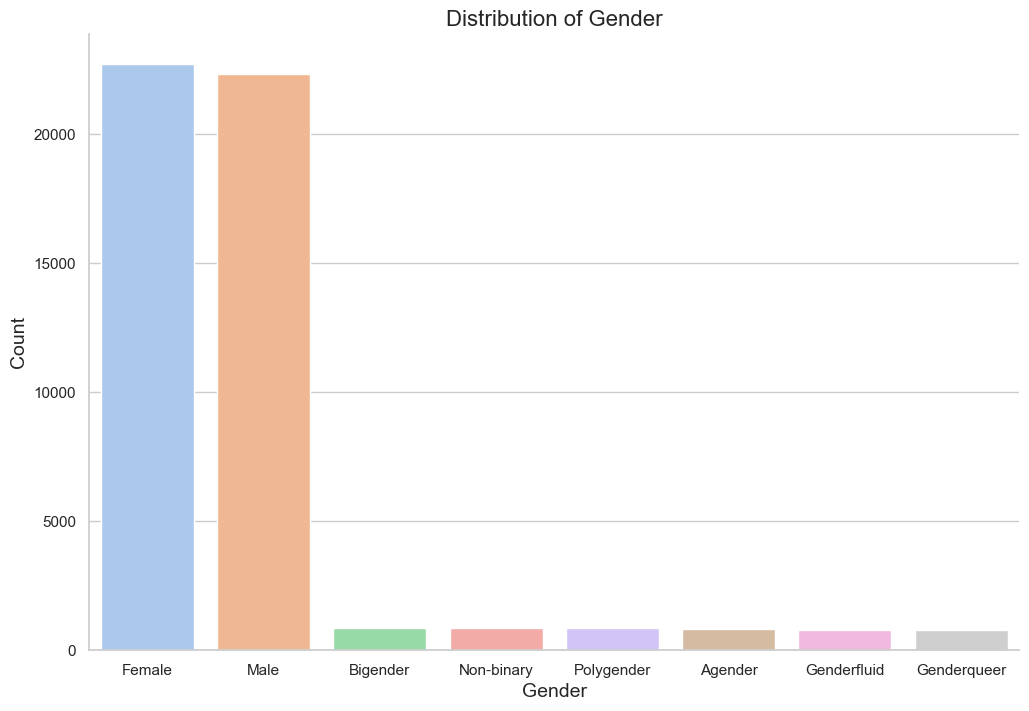

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pastel")

sns.countplot(x='gender', data=alien, palette=colors, order=alien['gender'].value_counts().index)

plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.despine()
plt.show()

### Alien Type

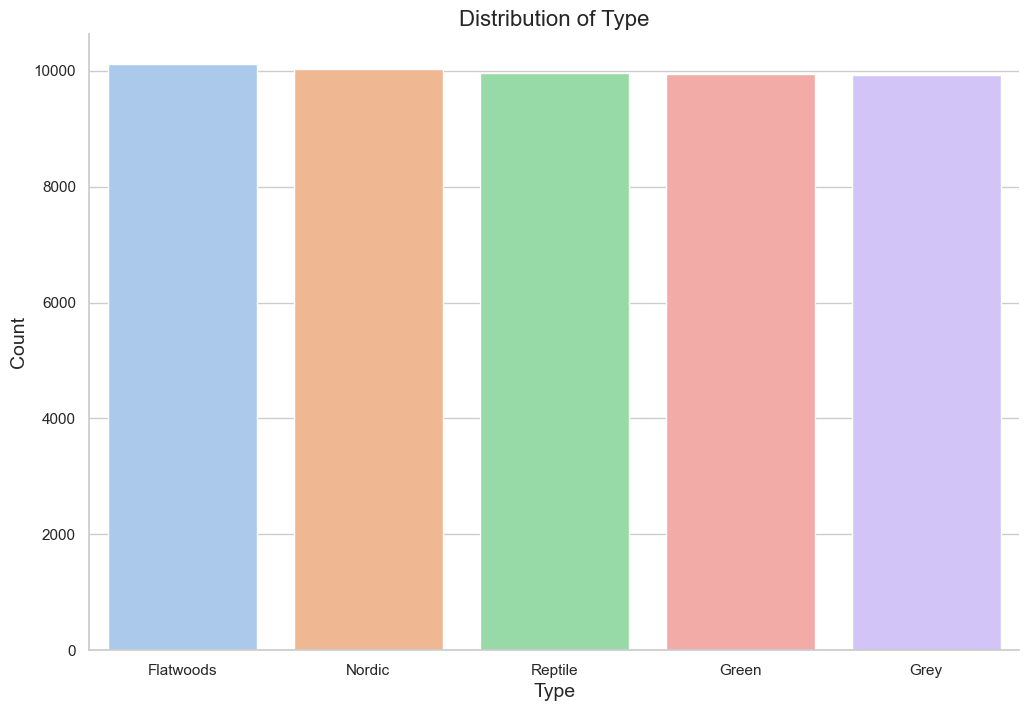

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pastel")

sns.countplot(x='type', data=alien, palette=colors, order=alien['type'].value_counts().index)

plt.title('Distribution of Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

sns.despine()
plt.show()

### Count per State

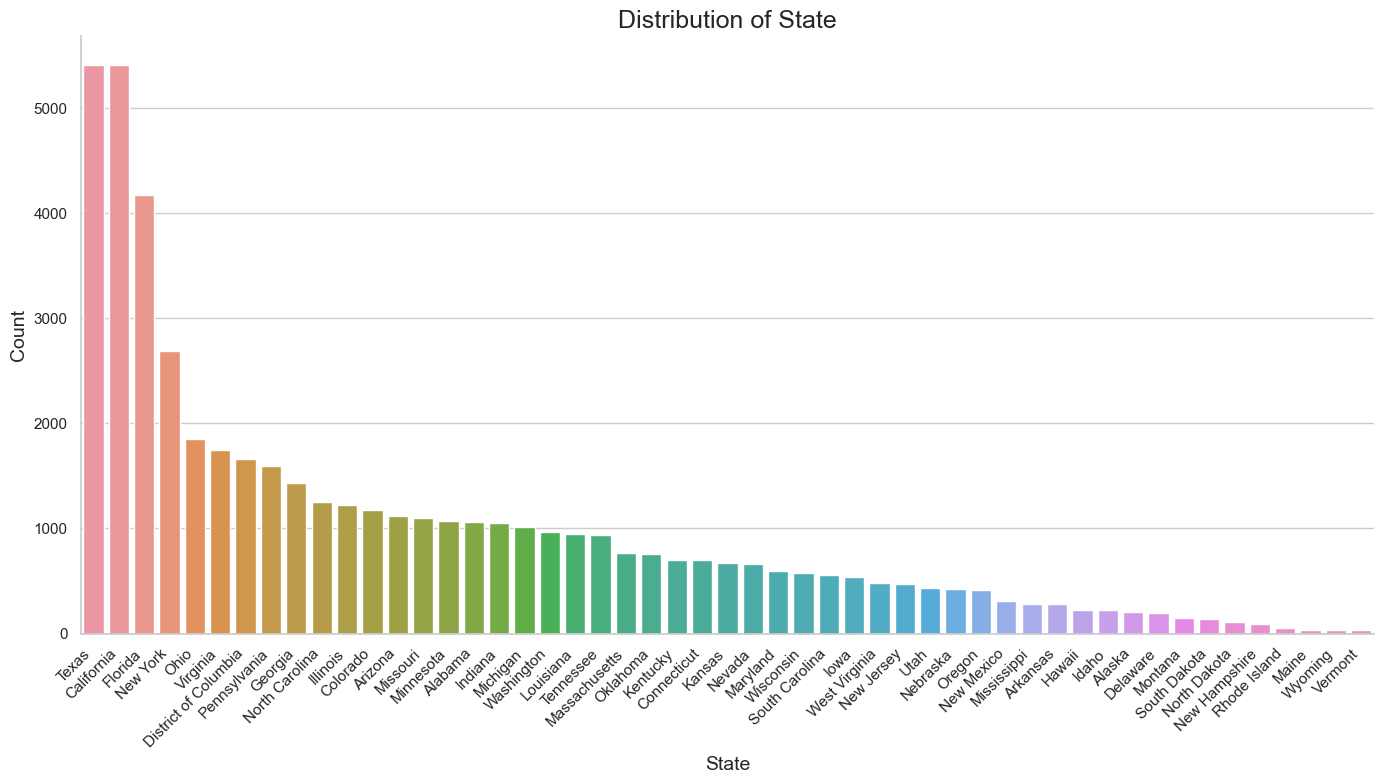

In [10]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 8))

ax = sns.countplot(x='state', data=alien, order=alien['state'].value_counts().index)

plt.title('Distribution of State', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.despine()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Birth Year

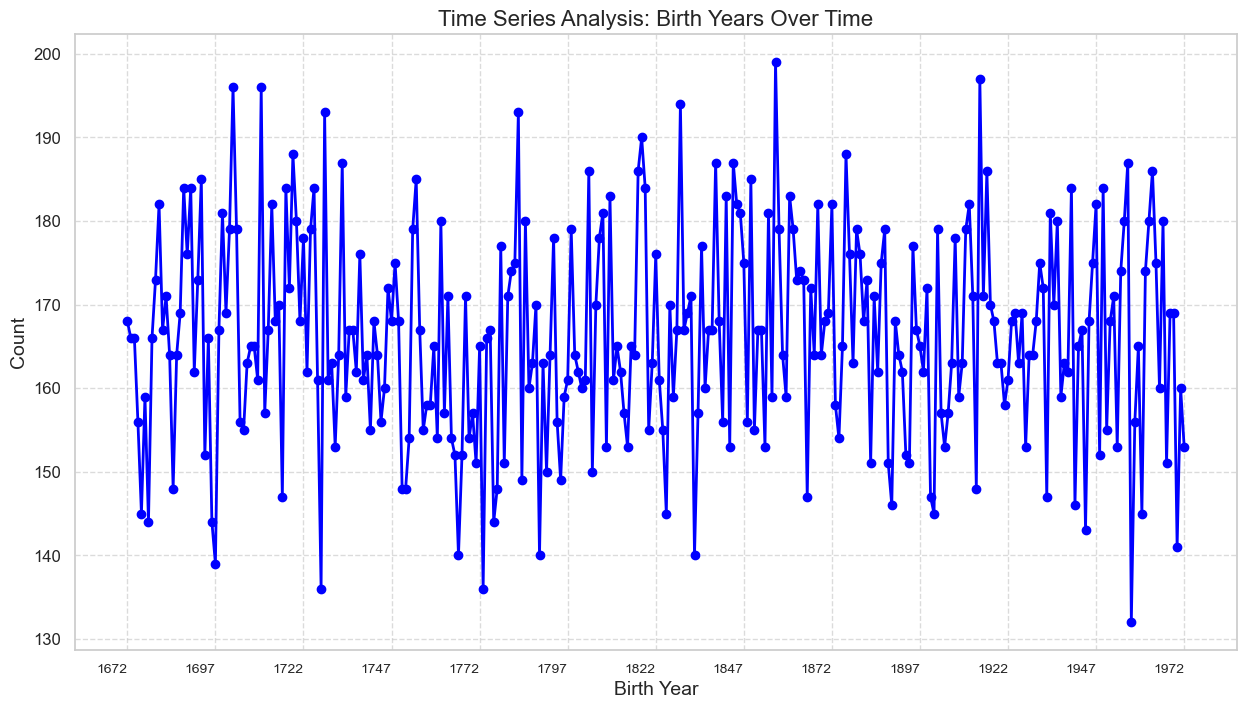

In [32]:
birth_year_counts = user_info['birth_year'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
birth_year_counts.plot(kind='line', marker='o', color='blue', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Time Series Analysis: Birth Years Over Time', fontsize=16)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(min(birth_year_counts.index), max(birth_year_counts.index)+1, 25), fontsize=12)
plt.xticks(rotation=0, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.show()

### Top 10 Current Locations

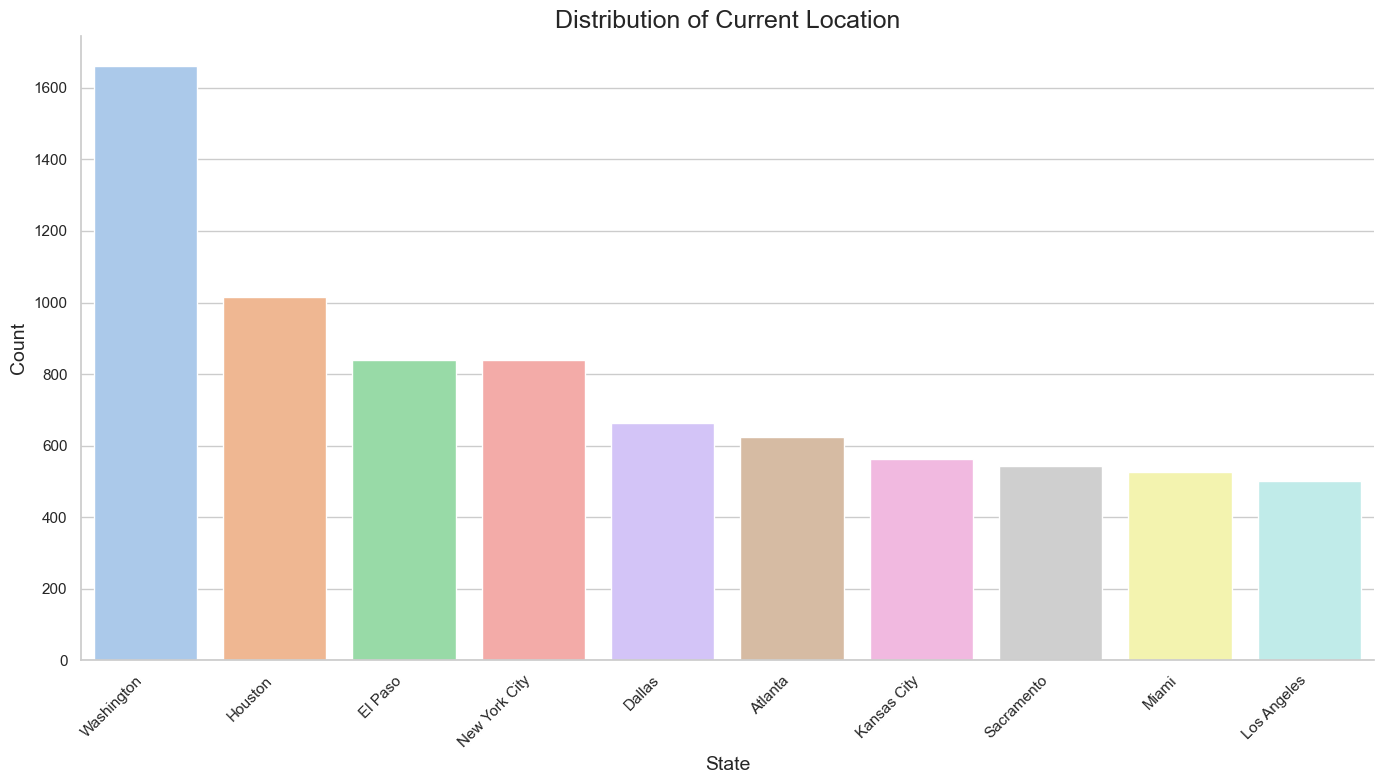

In [37]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 8))

top_locations = alien['current_location'].value_counts().nlargest(10).index

ax = sns.countplot(x='current_location', data=alien, order=top_locations)

plt.title('Distribution of Current Location', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.despine()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Data Preprocessing
Is the Alien aggressive or not?

In [41]:
alien.head()

,id,favorite_food,feeding_frequency,aggressive,first_name,last_name,email,gender,type,birth_year,current_location,state,country,occupation
0,1,White-faced tree rat,Weekly,True,Tyrus,Wrey,twrey0@sakura.ne.jp,Agender,Reptile,1717,Cincinnati,Ohio,United States,Senior Cost Accountant
1,2,"Lizard, goanna",Seldom,False,Ealasaid,St Louis,estlouis1@amazon.co.uk,Female,Flatwoods,1673,Bethesda,Maryland,United States,Senior Sales Associate
2,3,Indian red admiral,Weekly,True,Violette,Sawood,vsawood2@yolasite.com,Female,Nordic,1675,Oakland,California,United States,Registered Nurse
3,4,"Bandicoot, southern brown",Often,False,Rowan,Saintsbury,rsaintsbury3@rediff.com,Male,Green,1731,Richmond,Virginia,United States,Director of Sales
4,5,"Kangaroo, red",Once,False,Free,Ingolotti,fingolotti4@bbb.org,Genderfluid,Flatwoods,1763,Atlanta,Georgia,United States,Administrative Officer


### Importing Libraries

In [43]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# classification metrics libraries
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### Identifying Features and Target

In [45]:
alien['aggressive'] = alien['aggressive'].map({True:1, False:0})

X = alien.drop(columns=['aggressive'])

y = alien['aggressive']

In [46]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)